<a href="https://colab.research.google.com/github/mra49/Capstone/blob/main/capstonePostUnifyingipynb(previousInkaz).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###3-4)product_type cleaning for remington brand

In [285]:
import pandas as pd
import numpy as np

In [286]:
df = pd.read_csv("/content/drive/MyDrive/data/checkpoint_before_spaCy_eval.csv")

<ipython-input-286-caa7c61e0865>:1: DtypeWarning: Columns (5,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/data/checkpoint_before_spaCy_eval.csv")


In [287]:
df_rem = pd.read_csv("/content/drive/MyDrive/data/df_brand_remington dictionary.csv")

In [288]:
df_rem.columns

Index(['Item Number', 'Item Description', 'Brand', 'remington_codes',
       'product_type'],
      dtype='object')

In [289]:
# Filter df_rem for rows where the brand is 'Remington'
remington_df_rem = df_rem[df_rem['Brand'].str.lower() == 'remington']

# Create a dictionary mapping Item Number to product_type for Remington items
remington_product_type_dict = pd.Series(remington_df_rem['product_type'].values,
                                        index=remington_df_rem['Item Number']).to_dict()
item_dict = remington_product_type_dict

In [290]:
print(remington_product_type_dict)

{'1604509': 'Hair Straightner', '3326558': 'women shaver ', '1602944': 'Hair Straightner', '1602739': 'Hair Dryer', '334302': 'men shaver ', '1602746': 'Hair Dryer', '165015': 'Stylist', '168015': 'Hair Curler', '356772': 'Women Shaver', '168012': 'Hair Straightner', '1604503': 'Hair Curler', '3326527': 'Men Shaver', '168014': 'Hair Curler', '1602722': 'Hair Dryer', '1602753': 'Hair Dryer', '3514123': 'Women Shaver', '3304471': 'Men Shaver', '1604502': 'Hair Curler', '356771': 'Nail kit', '334286': 'Men Shaver ', '1623819': 'stylist', '1637700': 'Hair Straightner', '168009': 'Hair Dryer', '3346104': 'Women Shaver', '120035': 'hair brush ', '3342907': 'Men Shaver', '1604501': 'Hair Curler', '1623826': 'Hair Curler', '168001': 'Hair Dryer', '3300122': 'Men Shaver', '334022': 'Men Shaver', '33184': 'Men Shaver', '3300124': 'Men Shaver', '3300125': 'Men Shaver', '3300126': 'Men Shaver', '168959': 'Hair Straightner', '1602723': 'Hair Straightner', '1690668': 'Hair Straightner', '1647271': '

In [291]:
item_dict = {str(key): value for key, value in item_dict.items()}

# Load or define your DataFrame 'df'
# df = pd.read_csv('your_file.csv') or continue with your existing DataFrame

# Ensure the 'Item Number' column is of string type
df['Item Number'] = df['Item Number'].astype(str)

# Optional: Strip any leading/trailing spaces
df['Item Number'] = df['Item Number'].str.strip()

# Create a mask for rows where Item Number is in the dictionary
mask = df['Item Number'].isin(item_dict.keys())

# Apply the mapping only to rows where the mask is True
df.loc[mask, 'product_type'] = df.loc[mask, 'Item Number'].map(item_dict)

In [292]:
# Assuming df is your original DataFrame and it's already loaded

# Filter df for rows where the brand is 'Remington' and select only 'Item Number' and 'product_type'
df_check = df[['Item Number', 'product_type']]

# Display the first few rows of df_check
print(df_check.head())
df_check.to_csv("check_remsPT.csv", index = False)

  Item Number      product_type
0     1604509  Hair Straightner
1       56240              mask
2       56938        shower gel
3       56960        shower gel
4       57332               NaN


In [293]:
df.to_csv("df", index = False)

###3-5)Clean Brand product_type Category and Subcategory

In [294]:
# Rename the column
df.rename(columns={'Unified Description': 'Unified IN'}, inplace=True)

####3-5.1)quick Brand Cleaning

In [295]:
df['Brand'] = df['Brand'].replace('cleannet', 'clean net')

to_replace_brand = {
    "Keplex": ["semi prmnnt", "shampoo","keplex"],
    "babyliss" : ["electrical"],
    "reflet argin": ["reflet arg"],
    "vitality": ["tubes"],
    "k.keratin": ["conditioner","keratine", "coloration"]

}
# Replace values in 'Brand',
for new_value, old_values in to_replace_brand.items():
    df['Brand'].replace(old_values, new_value, inplace=True)

In [296]:
import pandas as pd

# Assuming your DataFrame is named df and is already loaded

# Function to update the Brand based on Item Description
def update_brand(row):
    if row['Item Description'].lower().startswith('wahl'):
        return 'wahl'
    return row['Brand']

# Apply the function to each row
df['Brand'] = df.apply(update_brand, axis=1)

# Now df will have the 'Brand' updated to 'wahl' where the Item Description starts with 'wahl'


In [297]:
# Count the occurrences of each unique value in the 'Brand' column
brand_counts = df['Brand'].value_counts()

# Display the counts
print(brand_counts)

style           42013
foamy           38922
clean net       12448
hawai            8768
remington         517
Keplex            151
wahl              110
k.keratin         109
vitality           90
reflet argin       84
treatment          70
babyliss           60
justformen         35
marvelisse         16
gl/cr/serum        14
elect stra         14
straightnr         11
cover spray        11
make-up            11
shaver mchn        10
oxydant             9
onemon col          9
men section         9
serum               8
mim                 6
wellness            6
curling mac         6
caviarine           5
h.accessor          5
wax                 4
scissors            4
promo item          4
h.r.machine         4
hairdrs bag         3
face care           3
promotion           3
mask/oil            3
fresheners          3
promo               2
wax machine         2
combs               2
rmvl paste          2
h.extension         2
glowy               2
gent                1
krys-krtn 

####3.5-2)product_type cleaning

In [298]:
import pandas as pd

# Load your DataFrame 'df'

# List of specific product types to replace with 'shampoo'
to_replace = [
    "shampoo", "sh.", "sh", "shampo", "shampoo1.125l*2",
    "shanpoo", "shamp", "sham", "sh.gallon", "sh/gel",
    "shamp.meridian", "sha."
]

# Replace each instance in 'product_type' with 'shampoo'
df['product_type'] = df['product_type'].replace(to_replace, 'shampoo')

In [299]:
#dishwashing
to_replace = [
    "dishwash", "dishwashing liquid","dishwashing","dishwasing","dishwash+hand soap"
]
# Replace each instance in 'product_type' with 'shampoo'
df['product_type'] = df['product_type'].replace(to_replace, 'dishwashing')


#laundry
to_replace = [
    "laundry", "laundry power", "laundry gel"
]
df['product_type'] = df['product_type'].replace(to_replace, 'laundry gel')


#fabric softner
df['product_type'] = df['product_type'].replace('fabric siftner', 'fabric softner')


#hand soap
to_replace = [
    "hnd sop", "hnd sp","hndsoap","1l*2+hand soap","handsoap"
]
df['product_type'] = df['product_type'].replace(to_replace, 'hand soap')


#shower gel
df['product_type'] = df['product_type'].replace("showergel", 'shower gel')


#fabric softner
df['product_type'] = df['product_type'].replace("fabric softener", 'fabric softner')

replacement_dict = {
    "bathroom cleaner": ["bathroom cleaner+sur", "bathroom cleaning", "antibacterial bathro"],
    "toilet cleaner": ["toilet gel cleaner"],
    "alcohol": ["alcohol spray", "pure alcohol"],
    "oxidant": ["oxydant"],
    "flash": ["flush"],
    "disinfectant": ["disinfectant cleaner", "bowl disinfectant"],
    "hair conditioner": ["conditioner", "bone marrow conditioning", "anti-oxidant conditioner", "conditioning mask",
                        "shampoo &conditioner", "bone marrow conditioning mask", "straightening conditioner",
                        "collagen conditioner", "salon conditioner", "anti-oxidant conditi", "cond", "cond mask"],
    "hair remover": ["r.was", "wax", "hair remov"],
    "thinning scissors" : ["thng.scrs"],
    "developer cream" : ["dev.cream"],
    "hair dye": ["vitality hair dye"],
    "keratin": ["keratin serum", "keratine collagen","k.keratine collagen"],
    "glass cleaner" : ["hostpital"],
    "lice remover" : ["cream"]
}

df['product_type'] = df['product_type'].replace("cream", 'lice remover')
# Replace values in 'product_type'
for new_value, old_values in replacement_dict.items():
    df['product_type'].replace(old_values, new_value, inplace=True)

####3.5-3) create Category and Subcategory Columns in df

In [300]:
df['product_type'] = df['product_type'].str.lower().str.strip()

In [301]:
#check
# Convert the 'product_type' column to lowercase
df['product_type'] = df['product_type'].str.lower()

# Count the occurrences of each unique value in the 'Brand' column
type_counts = df['product_type'].value_counts()

# Display the counts
df_productDistnCounts = type_counts.to_csv("df_product_check.csv")
print(type_counts)

shampoo             45354
dishwashing         19656
laundry gel          7048
general cleaner      4678
hand soap            4421
                    ...  
housing comple          1
fascinelle spray        1
anti-oxidant            1
lith clipper            1
cooling spray           1
Name: product_type, Length: 226, dtype: int64


we used df_productDistnCounts to create the dictionary by manually assigning distinct product types a category and subcategory. Its not the ideal approach but its the best course of action given the immense accuracy and work put into the cleaning process so far.

In [302]:
df_PT_dict = pd.read_csv("/content/drive/MyDrive/Capstone/df_type_dict.csv")

# Convert all values in 'product_type' column to lowercase and strip leading/trailing spaces
df_PT_dict['product_type'] = df_PT_dict['product_type'].str.lower().str.strip()
df_PT_dict['product_type'] = df_PT_dict['product_type'].replace("keratine collagen", "keratin")
df_PT_dict['product_type'] = df_PT_dict['product_type'].replace("thng. scrs", "thinning scissors")

#Category
df_PT_dict['Category '] = df_PT_dict['Category '].replace("Persnoal Care", "Personal Care")

###
replacement_dict = {
    "Personal Care" : ["Persnoal Care", "Personal Care or Household Cleaning", "Beauty and Cosmetics or Health", "Personal Care or Art Supplies"],
    "Others": ["Pet Supplies", "Hardware or Industrial", "Personal Care or Health", "Industrial or Household", "Stationery or Education", "Electronics or Construction"]

}

# Replace values in 'product_type'
for new_value, old_values in replacement_dict.items():
    df_PT_dict['Category '].replace(old_values, new_value, inplace=True)


In [303]:
# Get unique product_type values from df_PT_dict
unique_product_types_df_PT_dict = set(df_PT_dict['product_type'].unique())

# Get unique product_type values from df
unique_product_types_df = set(df['product_type'].unique())

# Find product_type values in df_PT_dict not present in df
product_types_not_in_df = unique_product_types_df_PT_dict - unique_product_types_df

# Print the product types not present in df
print("Product types in df_PT_dict not present in df:")
for product_type in product_types_not_in_df:
    print(product_type)


Product types in df_PT_dict not present in df:
thinning scissors


In [304]:
import pandas as pd

# Assuming df and df_PT_dict are already loaded

# Create mappings for Category and Subcategory from df_PT_dict
category_mapping = df_PT_dict.set_index('product_type')['Category '].to_dict()
subcategory_mapping = df_PT_dict.set_index('product_type')['Subcategory '].to_dict()

# Map the values to df
df['Category'] = df['product_type'].map(category_mapping)
df['Subcategory'] = df['product_type'].map(subcategory_mapping)


In [305]:
########## very important check point  ############
df.to_csv("df_postUnify_PreRFM.csv", index = False)

make sure that no product_type value is not present in the dictionary to avoid any faults in the data

###3.6) Extra Cleaning (Location)

do we add admin to intercompany

In [306]:
import pandas as pd

# Assuming your DataFrame is named df and it's already loaded

# Get unique values from the 'Location ID' column
unique_location_ids = df['Location ID'].unique()
print(unique_location_ids.sum)
# Print the unique values
print("Unique Location IDs:")
print(unique_location_ids)

<built-in method sum of numpy.ndarray object at 0x7feee8d62bb0>
Unique Location IDs:
['slska1' 'intercompany' 'slssth2' 'sprvsrsth' 'sprvsrbek' 'slsbek2'
 'slsptc02m2' 'admin' 'slssbr' 'slsdbs' 'slsbrt' 'salons' 'slsmtn'
 'pharmacies' 'export' 'slsmtn-ksn' 'sprvsrnor' 'slsksn-jbl' 'SLSSBR'
 'SLSBRT' nan]


In [307]:
location_dic = {
    "all branches" : ["Slska1"],
    "South" : ["slssth2"],
    "North" : ["sprvsrnor"],
    "Baalbek-Hermel": ["slsbek2"],
    "Beirut" : ["slsbrt","SLSBRT"],
    "Beqaa" : ["sprvsrbek",],
    "Kesrwen-Jbeil" : ["slsmtn-ksn","slsksn-jbl","slsmtn"],
    "Mount Lebanon": ["slssbr", "SLSSBR"],
    "Nabatieh" : ["sprvsrsth"],
    "intercompany" : ["slsptc02m2"]
}
for new_value, old_values in location_dic.items():
    df['Location ID'].replace(old_values, new_value, inplace=True)

In [308]:
import pandas as pd

# Assuming your DataFrame is named df and it's already loaded

# Count the number of distinct items
distinct_Locations = df['Location ID'].nunique()

# Print the count of distinct items
print(f"There are {distinct_Locations} distinct items.")


There are 15 distinct items.


###3.7) Extra columns

In [309]:
import pandas as pd

# Assuming your DataFrame is named df and it's already loaded

# Function to check for a plus sign in the item description
def check_offer(description):
    return 1 if '+' in description else 0

# Apply the function to create the 'With Offer' column
df['With Offer'] = df['Item Description'].apply(check_offer)

# Count the number of items with and without offers
offer_counts = df['With Offer'].value_counts()

# Print the counts
print("Number of items with offers:", offer_counts.get(1, 0))
print("Number of items without offers:", offer_counts.get(0, 0))


Number of items with offers: 3342
Number of items without offers: 100237


In [310]:
import pandas as pd

# Assuming your DataFrame is named df and it's already loaded

# Convert 'Document Date' to datetime if it's not already
df['Document Date'] = pd.to_datetime(df['Document Date'])

# Extract day, month, and year
df['Day'] = df['Document Date'].dt.day
df['Month'] = df['Document Date'].dt.month
df['Year'] = df['Document Date'].dt.year

# Now df will have new columns 'Day', 'Month', and 'Year'


In [311]:
print(df[['Document Date', 'Day', 'Month', 'Year']].iloc[4459]) #working well

Document Date    2020-02-27 00:00:00
Day                               27
Month                              2
Year                            2020
Name: 4459, dtype: object


In [312]:
# Group by "product_type" and sum the quantities
product_type_counts = df.groupby('product_type')['QTY'].sum().reset_index()

# Rename the columns for clarity
product_type_counts.columns = ['product_type', 'Total_QTY']

# Display the distinct product types and their respective quantities
print(product_type_counts)


                       product_type  Total_QTY
0            abaya for black & dark        899
1    adhesive remover for extension         89
2          after shave balm&cologne        335
3                      air freshner          9
4                           alcohol      12441
..                              ...        ...
221                         wax kit         13
222                        wet look         39
223                 whitening cream         96
224                    women shaver        137
225                wrinkle releaser        131

[226 rows x 2 columns]


###3.8) Customer Names Cleaning

###3.9) Most Important, Fix Prices

In [313]:
import os
os.chdir('/content/drive/MyDrive/Capstone')

In [314]:
rate_df = pd.read_csv("/content/drive/MyDrive/Capstone/usd-lbp.csv")

In [315]:
import pandas as pd

# Convert the date-time column in rate_df to datetime and extract the date part
rate_df['Date'] = pd.to_datetime(rate_df['DateTime']).dt.date

# Aggregate rate_df to have only one rate per date if there are multiple entries per date
# Here, we are taking the mean of the rates for each date
daily_rates = rate_df.groupby('Date')['USD to LBP'].mean().reset_index()

# Convert the date column in df to datetime (if it's not already)
df['Document Date'] = pd.to_datetime(df['Document Date']).dt.date

# Merge the DataFrames on the date column
# This will add the mean daily rate to your main df
df_merged = pd.merge(df, daily_rates, left_on='Document Date', right_on='Date', how='left')

# Drop the extra 'Date' column from the merge if you wish
df_merged.drop('Date', axis=1, inplace=True)


In [316]:
df = df_merged

In [317]:
df_merged.columns

Index(['Location', 'Brand', 'SubBrand', 'Category', 'SOP Number',
       'Item Number', 'Item Description', 'QTY', 'Unit Price',
       'Extended Price', 'Customer Number', 'Document Date', 'Location Code',
       'Item Short Name', 'Customer Name', 'SOP Type', 'Location ID',
       'Offer Status', 'product_type', 'product_scent', 'product_size',
       'Unique Description', 'Description Length', 'Unified IN', 'Subcategory',
       'With Offer', 'Day', 'Month', 'Year', 'USD to LBP'],
      dtype='object')

In [318]:
df_merged.to_csv("with_rate_old_prices.csv", index = False)

In [319]:
# # Identify the top 10 selling product types
# top_product_types = df.groupby('product_type')['QTY'].sum().nlargest(10).index

# # Ensure that 'Unit Price' and 'USD to LBP' are numeric
# df['Unit Price'] = pd.to_numeric(df['Unit Price'], errors='coerce')
# df['USD to LBP'] = pd.to_numeric(df['USD to LBP'], errors='coerce')

# # Replace 0 with 1 in 'USD to LBP' to avoid division by zero
# df['USD to LBP'].replace(0, 1, inplace=True)
# df['USD to LBP'].fillna(1, inplace=True) # Replace NaN with 1

# # Function to calculate the adjusted rate
# def calculate_rate(row):
#     if row['product_type'] in top_product_types and row['Unit Price'] > 27 and row['USD to LBP'] != 1:
#         return (row['Unit Price'] * 1500) / row['USD to LBP']
#     else:
#         return row['Unit Price']

# # Apply the function to create the 'rate_calculated' column
# df['rate_calculated'] = df.apply(calculate_rate, axis=1)

In [320]:
# # Rename 'Extended Price' to 'Extended Price OLD'
# df.rename(columns={'Extended Price': 'Extended Price OLD'}, inplace=True)

# # Ensure 'QTY' and 'rate_calculated' are numeric
# df['QTY'] = pd.to_numeric(df['QTY'], errors='coerce')
# df['rate_calculated'] = pd.to_numeric(df['rate_calculated'], errors='coerce')

# # Create a new 'Extended Price' column by multiplying 'QTY' by 'rate_calculated'
# df['Extended Price'] = df['QTY'] * df['rate_calculated']

In [321]:
# import os
# os.chdir('/content/drive/MyDrive/Capstone')
# ########## very important check point  ############
# df.to_csv("df_postUnify_PreRFM.csv", index = False)

##4)RFM Analysis

In [322]:
# create a dataset solely for working on RFM analysis
df_rfm = df_merged

###4.1) Removing ID reselling points

In [323]:
#here we're going to remove ID's own retailers
import pandas as pd

# Define your multiple conditions
customer_names = ['customers cash/wtc03', 'customers cash/', 'customers cash_']
location_ids = ['intercompany', 'admin', 'slsdbs', 'slsptc02m2']


# Filter df_frm based on these conditions
condition = df_rfm['Customer Name'].isin(customer_names) | df_rfm['Location ID'].isin(location_ids)
filtered_df = df_rfm[condition]

# Create list of unique customer numbers
unique_customer_numbers = filtered_df['Customer Number'].unique()

# Drop these customers from df_rfm
df_rfm = df_rfm[~df_rfm['Customer Number'].isin(unique_customer_numbers)]


###4.2) Calculate the 3 scores for every column

In [324]:
####### calculating the R F and M for our Customers  ###########
import pandas as pd
from datetime import datetime

# Assuming your DataFrame is named df_rfm and it's already loaded
# Also, assuming 'Document Date' is in a standard date format like 'YYYY-MM-DD'

# Convert 'Document Date' to datetime
df_rfm['Document Date'] = pd.to_datetime(df_rfm['Document Date'])

# Determine your analysis date - typically one day after your latest date in the dataset
latest_date = df_rfm['Document Date'].max() + pd.Timedelta(days = 1)

# Calculate Recency (days since last purchase)
recency = df_rfm.groupby('Customer Number')['Document Date'].max()
recency = (latest_date - recency).dt.days
recency = recency.reset_index()
recency.columns = ['Customer Number', 'Recency']

#Calculate Frequency (number of unique invoices per customer)
frequency = df_rfm.groupby('Customer Number')['SOP Number'].nunique()
frequency = frequency.reset_index()
frequency.columns = ['Customer Number', 'Frequency']

# Calculate Monetary (total money spent)
monetary = df_rfm.groupby('Customer Number')['Extended Price'].sum()  # Replace 'Extended Price' with your monetary column name
monetary = monetary.reset_index()
monetary.columns = ['Customer Number', 'Monetary']

# Merge the recency, frequency, and monetary dataframes
df_rfm_segment = pd.merge(recency, frequency, on='Customer Number')
df_rfm_segment = pd.merge(df_rfm_segment, monetary, on='Customer Number')

# Display the first few rows of the RFM table
print(df_rfm_segment.head())


  Customer Number  Recency  Frequency   Monetary
0      000c001843      931          3    887.013
1      000c002061      263         10  22773.877
2      000c002093      127         10   4362.490
3      000c002097       98         15  13162.803
4      000c002129        9          4   2541.310


<ipython-input-324-501992d6add2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['Document Date'] = pd.to_datetime(df_rfm['Document Date'])


###4.2_Clustering

In [325]:
df_rfm_segment.shape

(1556, 4)

In [326]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_rfm_segment[['Recency', 'Frequency', 'Monetary']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

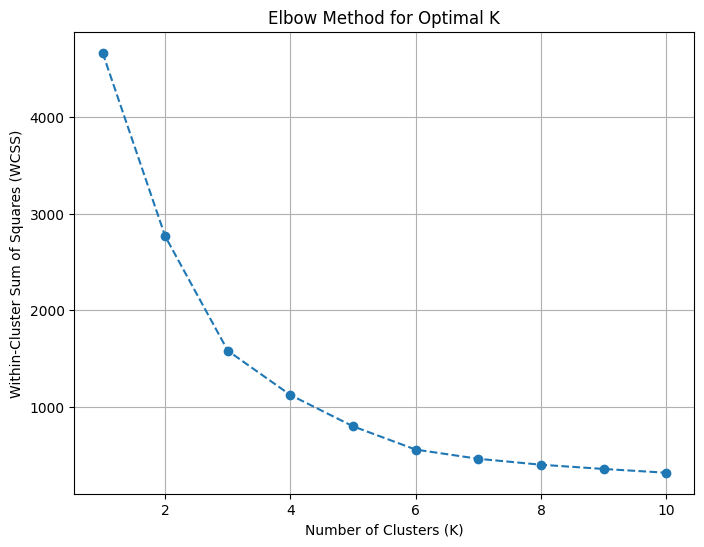

In [327]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,  init='k-means++',  random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid()
plt.show()

In [328]:
optimal_k = 3  # Replace with your chosen K value
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(scaled_data)

# Add cluster labels to the DataFrame
df_rfm_segment['Cluster'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


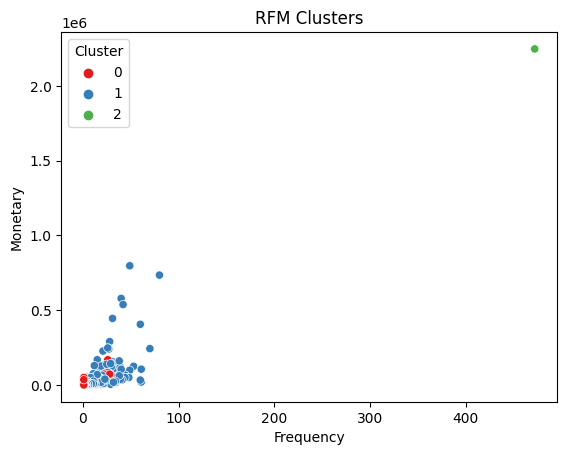

In [329]:
import seaborn as sns

# Visualize the clusters
sns.scatterplot(x='Frequency', y='Monetary', hue='Cluster', data=df_rfm_segment, palette='Set1')
plt.title('RFM Clusters')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

In [330]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
# Calculate and print evaluation metrics for the initial clustering
silhouette_avg_initial = silhouette_score(scaled_data, kmeans.labels_)
davies_bouldin_initial = davies_bouldin_score(scaled_data, kmeans.labels_)
calinski_harabasz_initial = calinski_harabasz_score(scaled_data, kmeans.labels_)

print("Initial Silhouette Score:", silhouette_avg_initial)
print("Initial Davies-Bouldin Index:", davies_bouldin_initial)
print("Initial Calinski-Harabasz Index:", calinski_harabasz_initial)

Initial Silhouette Score: 0.48200861695926156
Initial Davies-Bouldin Index: 0.5452121380417083
Initial Calinski-Harabasz Index: 1516.3408388316623


####Changing the scaler

In [331]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
# Select the RFM variables for clustering
rfm_data = df_rfm_segment[['Recency', 'Frequency', 'Monetary']]

# # Initialize the RobustScaler
# scaler = RobustScaler()

# scaler = MinMaxScaler(feature_range=(0, 1))
# Fit and transform the data
scaled_data = scaler.fit_transform(rfm_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

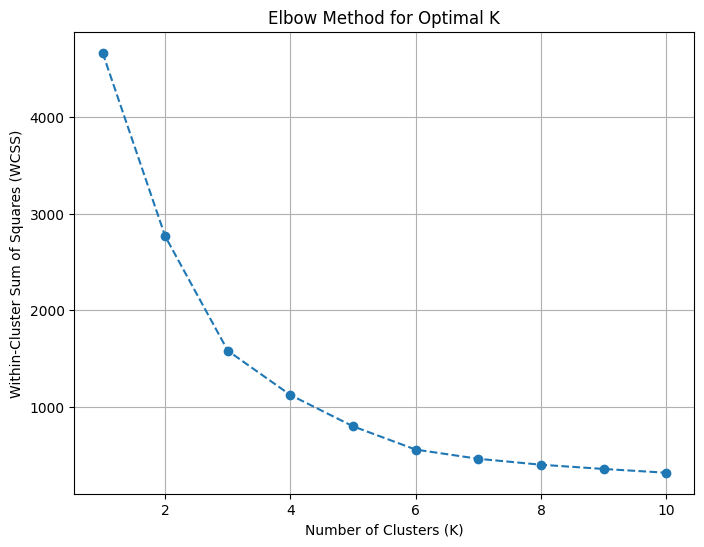

Initial Silhouette Score: 0.48200861695926156
Initial Davies-Bouldin Index: 0.5452121380417083
Initial Calinski-Harabasz Index: 1516.3408388316623


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [332]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,  init='k-means++',  random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid()
plt.show()

# Replace with your chosen K value
optimal_k = 3  # Replace with your chosen K value
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(scaled_data)

# Add cluster labels to the DataFrame
df_rfm_segment['Cluster'] = kmeans.labels_
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
# Calculate and print evaluation metrics for the initial clustering
silhouette_avg_initial = silhouette_score(scaled_data, kmeans.labels_)
davies_bouldin_initial = davies_bouldin_score(scaled_data, kmeans.labels_)
calinski_harabasz_initial = calinski_harabasz_score(scaled_data, kmeans.labels_)

print("Initial Silhouette Score:", silhouette_avg_initial)
print("Initial Davies-Bouldin Index:", davies_bouldin_initial)
print("Initial Calinski-Harabasz Index:", calinski_harabasz_initial)


In [333]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Step 1: Remove outliers using the IQR method
Q1 = df_rfm_segment[['Monetary', 'Recency', 'Frequency']].quantile(0.25)
Q3 = df_rfm_segment[['Monetary', 'Recency', 'Frequency']].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
filtered_data = df_rfm_segment[~((df_rfm_segment[['Monetary', 'Recency', 'Frequency']] < (Q1 - 1.5 * IQR)) |
                                (df_rfm_segment[['Monetary', 'Recency', 'Frequency']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Step 2: Scale the filtered data
scaler = StandardScaler()
scaled_filtered_data = scaler.fit_transform(filtered_data[['Monetary', 'Recency', 'Frequency']])

# Step 3: Fit the K-means model to the scaled, filtered data
optimal_k = 3  # Replace with your chosen K value
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(scaled_filtered_data)

# Add cluster labels to the filtered DataFrame
filtered_data['Cluster'] = kmeans.labels_

# Step 4: Calculate evaluation metrics for the scaled, filtered data
silhouette_avg_filtered = silhouette_score(scaled_filtered_data, kmeans.labels_)
davies_bouldin_filtered = davies_bouldin_score(scaled_filtered_data, kmeans.labels_)
calinski_harabasz_filtered = calinski_harabasz_score(scaled_filtered_data, kmeans.labels_)

# Print the evaluation metrics for the scaled, filtered data
print("Silhouette Score (Scaled, Filtered Data):", silhouette_avg_filtered)
print("Davies-Bouldin Index (Scaled, Filtered Data):", davies_bouldin_filtered)
print("Calinski-Harabasz Index (Scaled, Filtered Data):", calinski_harabasz_filtered)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-333-685b181ae49b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = kmeans.labels_


Silhouette Score (Scaled, Filtered Data): 0.41620038863105374
Davies-Bouldin Index (Scaled, Filtered Data): 0.8574714931942756
Calinski-Harabasz Index (Scaled, Filtered Data): 1121.39634260607


In [334]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Define the K-means model with your chosen K value
optimal_k = 3  # Replace with your chosen K value
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42) #k-means++

# Fit the K-means model to the scaled data
#kmeans.fit(scaled_data)

# # Add cluster labels to the DataFrame
# df_rfm_segment['Cluster'] = kmeans.labels_

# Remove outliers using the IQR method
Q1 = df_rfm_segment[['Monetary', 'Recency', 'Frequency']].quantile(0.25)
Q3 = df_rfm_segment[['Monetary', 'Recency', 'Frequency']].quantile(0.75)
IQR = Q3 - Q1


filtered_data = df_rfm_segment[~((df_rfm_segment[['Monetary', 'Recency', 'Frequency']] < (Q1 - 1.5 * IQR)) | (df_rfm_segment[['Monetary', 'Recency', 'Frequency']] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_filtered = filtered_data[['Monetary', 'Recency', 'Frequency']]
# Fit the K-means model to the filtered data
kmeans.fit(filtered_data[['Monetary', 'Recency', 'Frequency']])

# Add cluster labels to the filtered DataFrame
df_filtered['Cluster'] = kmeans.labels_

# Calculate evaluation metrics for the filtered data
silhouette_avg_filtered = silhouette_score(df_filtered, kmeans.labels_)
davies_bouldin_filtered = davies_bouldin_score(df_filtered, kmeans.labels_)
calinski_harabasz_filtered = calinski_harabasz_score(df_filtered, kmeans.labels_)


# Print the evaluation metrics for the filtered data
print("Silhouette Score (Filtered Data):", silhouette_avg_filtered)
print("Davies-Bouldin Index (Filtered Data):", davies_bouldin_filtered)
print("Calinski-Harabasz Index (Filtered Data):", calinski_harabasz_filtered)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (Filtered Data): 0.665556379631769
Davies-Bouldin Index (Filtered Data): 0.48481099873354266
Calinski-Harabasz Index (Filtered Data): 5001.044027985099


<ipython-input-334-8902fc71426a>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Cluster'] = kmeans.labels_


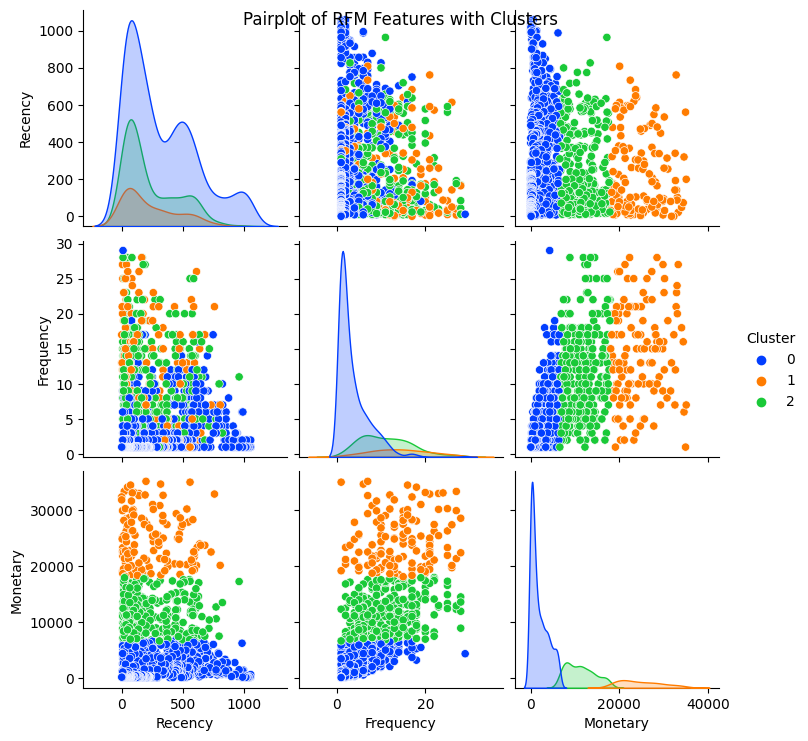

In [335]:
# Assuming df_filtered has the cluster labels and df_scaled is the normalized data
sns.pairplot(df_filtered, hue='Cluster', vars=['Recency', 'Frequency', 'Monetary'], palette='bright')
plt.suptitle('Pairplot of RFM Features with Clusters')
plt.show()

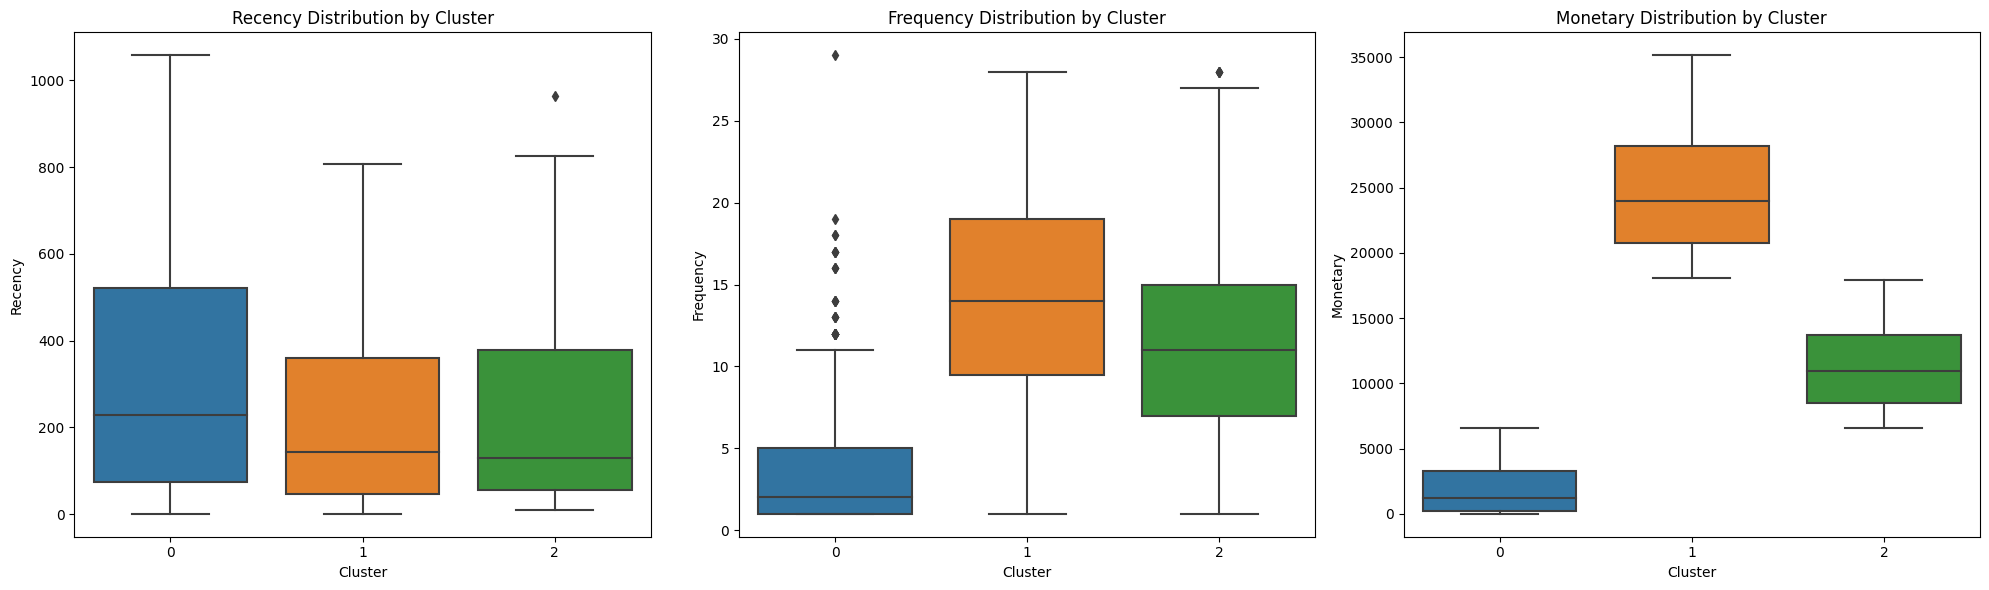

In [336]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_filtered is already defined and contains the clustering results with 'Cluster' labels.

plt.figure(figsize=(20, 6))

# Recency Distribution by Cluster
plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster', y='Recency', data=df_filtered)
plt.title('Recency Distribution by Cluster')

# Frequency Distribution by Cluster
plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster', y='Frequency', data=df_filtered)
plt.title('Frequency Distribution by Cluster')

# Monetary Distribution by Cluster
plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster', y='Monetary', data=df_filtered)
plt.title('Monetary Distribution by Cluster')

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
# Assuming df_filtered has the cluster labels and df_scaled is the normalized data
sns.pairplot(df_filtered, hue='Cluster', vars=['Recency', 'Frequency', 'Monetary'], palette='bright')
plt.suptitle('Pairplot of RFM Features with Clusters')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Define different initialization methods
initialization_methods = ['k-means++', 'random']

# Iterate over each method and fit the K-means model
for init_method in initialization_methods:
    kmeans = KMeans(n_clusters=optimal_k, init=init_method, random_state=42)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_

    # Calculate evaluation metrics
    silhouette_avg = silhouette_score(scaled_data, labels)
    davies_bouldin = davies_bouldin_score(scaled_data, labels)
    calinski_harabasz = calinski_harabasz_score(scaled_data, labels)

    # Print the evaluation metrics
    print(f"Initialization Method: {init_method}")
    print("Silhouette Score:", silhouette_avg)
    print("Davies-Bouldin Index:", davies_bouldin)
    print("Calinski-Harabasz Index:", calinski_harabasz)
    print()


In [ ]:
from sklearn.model_selection import KFold
import numpy as np

# Number of splits for cross-validation
n_splits = 5

# Initialize KFold
kf = KFold(n_splits=n_splits)

# Prepare to collect silhouette scores for each fold
silhouette_scores = []

# Perform KFold cross-validation
for train_index, test_index in kf.split(scaled_data):
    # Split data
    X_train, X_test = scaled_data[train_index], scaled_data[test_index]

    # Fit K-means model on training data
    kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
    kmeans.fit(X_train)

    # Predict on test data
    test_labels = kmeans.predict(X_test)

    # Calculate silhouette score on test data
    silhouette_avg = silhouette_score(X_test, test_labels)
    silhouette_scores.append(silhouette_avg)

# Calculate and print the average silhouette score across all folds
average_silhouette = np.mean(silhouette_scores)
print("Average Silhouette Score across all folds:", average_silhouette)


####visualizing the clustering

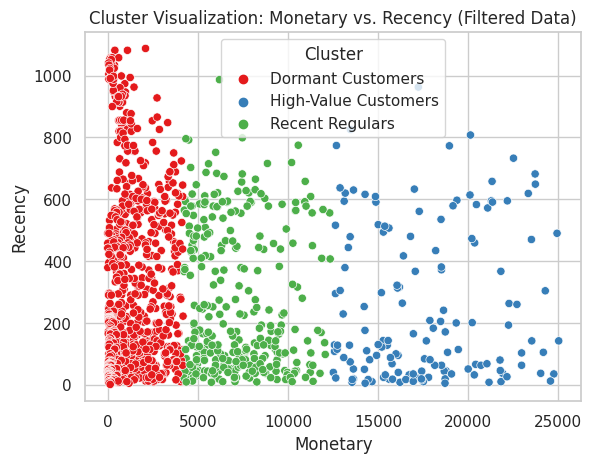

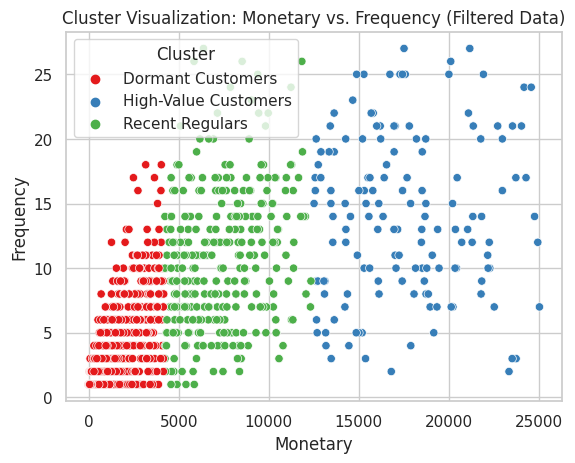

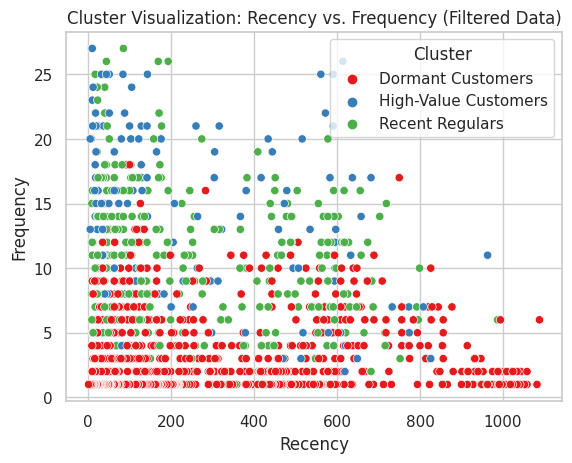

Cluster Sizes:
Dormant Customers       859
Recent Regulars         313
High-Value Customers    146
Name: Cluster, dtype: int64
Cluster Characteristics (Mean Values):
                          Monetary     Recency  Frequency
Cluster                                                  
Dormant Customers      1224.704525  318.211874   3.302678
High-Value Customers  17607.394095  251.979452  14.061644
Recent Regulars        7212.799588  262.907348  10.517572


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the clusters after removing outliers

# Scatter plot: Monetary vs. Recency
sns.scatterplot(x='Monetary', y='Recency', hue='Cluster', data=filtered_data, palette='Set1')
plt.title('Cluster Visualization: Monetary vs. Recency (Filtered Data)')
plt.xlabel('Monetary')
plt.ylabel('Recency')
plt.show()

# Scatter plot: Monetary vs. Frequency
sns.scatterplot(x='Monetary', y='Frequency', hue='Cluster', data=filtered_data, palette='Set1')
plt.title('Cluster Visualization: Monetary vs. Frequency (Filtered Data)')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.show()

# Scatter plot: Recency vs. Frequency
sns.scatterplot(x='Recency', y='Frequency', hue='Cluster', data=filtered_data, palette='Set1')
plt.title('Cluster Visualization: Recency vs. Frequency (Filtered Data)')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

# Check the size of each cluster
cluster_sizes = filtered_data['Cluster'].value_counts()
print("Cluster Sizes:")
print(cluster_sizes)

# Cluster Characteristics (Mean values)
cluster_means = filtered_data.groupby('Cluster')[['Monetary', 'Recency', 'Frequency']].mean()
print("Cluster Characteristics (Mean Values):")
print(cluster_means)


In [ ]:
# Calculate the mean of each feature for each cluster
cluster_means = filtered_data.groupby('Cluster').mean()

# Display the cluster means
cluster_means


<ipython-input-73-db0df7070958>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = filtered_data.groupby('Cluster').mean()


,Recency,Frequency,Monetary
Cluster,,,
Dormant Customers,318.211874,3.302678,1224.704525
High-Value Customers,251.979452,14.061644,17607.394095
Recent Regulars,262.907348,10.517572,7212.799588


In [ ]:
from scipy.stats import f_oneway

# Perform ANOVA test for each feature
for column in ['Monetary', 'Recency', 'Frequency']:
    anova_results = f_oneway(filtered_data[filtered_data['Cluster'] == 0][column],
                             filtered_data[filtered_data['Cluster'] == 1][column],
                             filtered_data[filtered_data['Cluster'] == 2][column])
    print(f"ANOVA result for {column}: F-Statistic = {anova_results.statistic}, p-value = {anova_results.pvalue}")


ANOVA result for Monetary: F-Statistic = nan, p-value = nan
ANOVA result for Recency: F-Statistic = nan, p-value = nan
ANOVA result for Frequency: F-Statistic = nan, p-value = nan


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


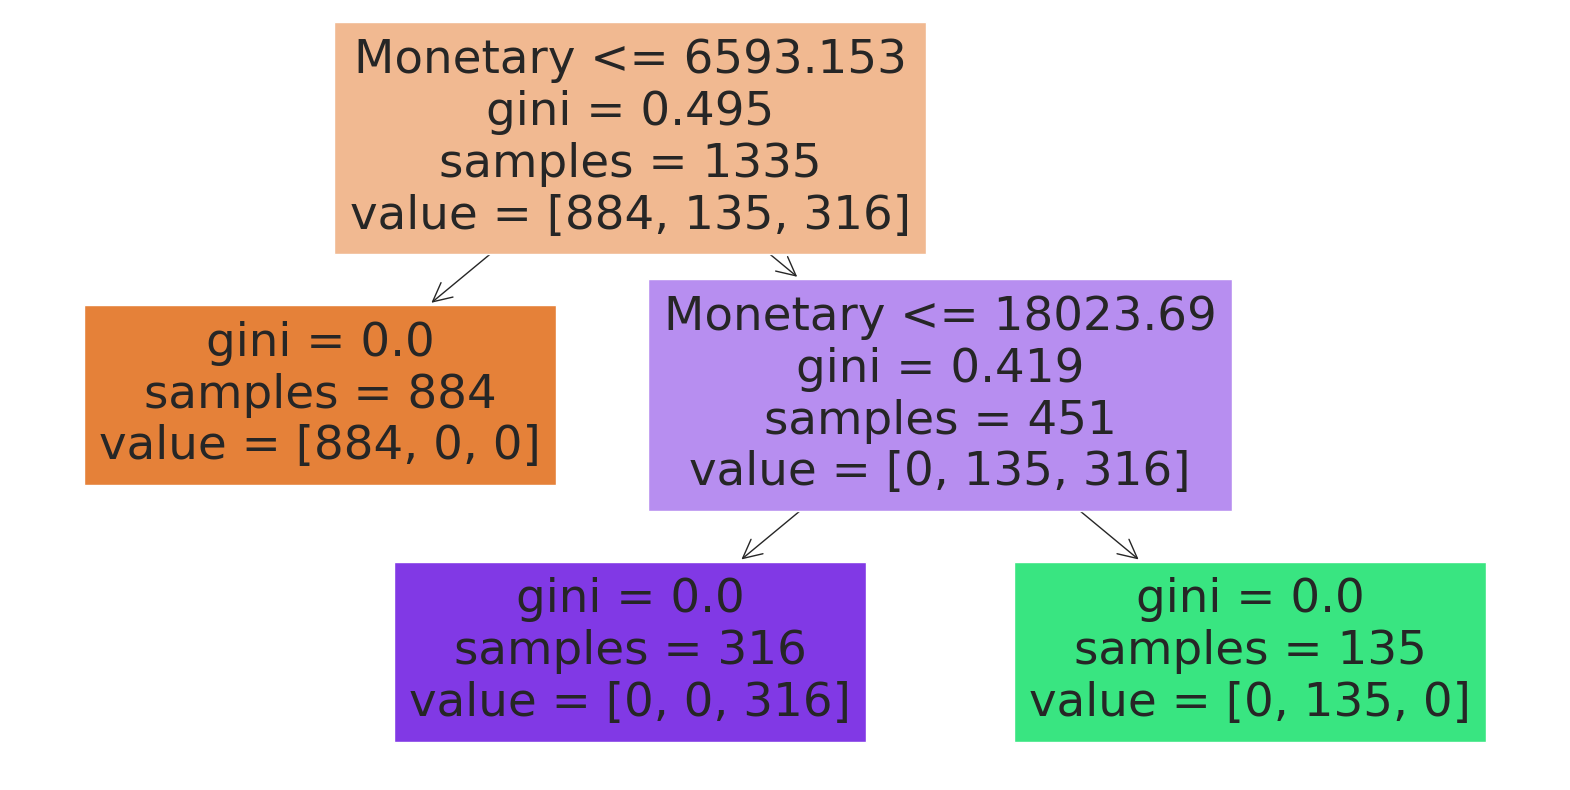

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Prepare data for decision tree
X = filtered_data[['Monetary', 'Recency', 'Frequency']]
y = filtered_data['Cluster']

# Train decision tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=['Monetary', 'Recency', 'Frequency'])
plt.show()


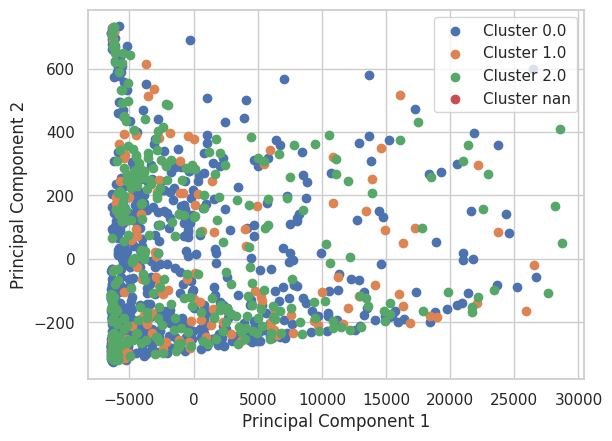

In [ ]:



from sklearn.decomposition import PCA

# Apply PCA for 2D visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Create a DataFrame for the 2D data
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = y

# Plot each cluster
for cluster in sorted(df_pca['Cluster'].unique()):
    cluster_data = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [ ]:
# from sklearn.cluster import KMeans
# from sklearn.model_selection import GridSearchCV

# # Define the hyperparameter grid
# param_grid = {
#     'n_clusters': [2, 3, 4, 5],  # Adjust the range of cluster values
#     'init': ['k-means++', 'random'],
#     'n_init': [10, 20, 30],  # Number of times the algorithm will be run with different centroids
#     'max_iter': [100, 200, 300]  # Maximum number of iterations for each run
# }

# # Initialize K-means
# kmeans = KMeans(random_state=42)

# # Use GridSearchCV to find the best parameters
# grid_search = GridSearchCV(kmeans, param_grid, scoring='silhouette', cv=5)
# grid_search.fit(scaled_data)

# # Get the best K-means model with optimal parameters
# best_kmeans = grid_search.best_estimator_

# # Fit the best K-means model to the data
# best_kmeans.fit(scaled_data)

# # Get the labels from the best K-means model
# final_labels = best_kmeans.labels_

# # Calculate Silhouette Score for the best model
# silhouette_avg = silhouette_score(scaled_data, final_labels)
# print("Best Silhouette Score:", silhouette_avg)


###4.3)Create bins and label them to rank the score

In [ ]:
# Define custom bins for Frequency based on business logic
bins = [0, 2, 6, 12, 20, df_rfm_segment['Frequency'].max()]
labels = [1, 2, 3, 4, 5]

# Assign the Frequency scores based on the bins
df_rfm_segment['F_Score'] = pd.cut(df_rfm_segment['Frequency'], bins=bins, labels=labels)


# Recency Binning with qcut
# Note: For Recency, lower values are better, so we reverse the labels
df_rfm_segment['R_Score'] = pd.qcut(df_rfm_segment['Recency'], 5, labels=[5, 4, 3, 2, 1], duplicates='drop')

# Monetary Binning with qcut
df_rfm_segment['M_Score'] = pd.qcut(df_rfm_segment['Monetary'], 5, labels=[1, 2, 3, 4, 5], duplicates='drop')


In [ ]:
# Count the number of records in each bin for R_Score, F_Score, and M_Score
r_score_counts = df_rfm_segment['R_Score'].value_counts().sort_index()
f_score_counts = df_rfm_segment['F_Score'].value_counts().sort_index()
m_score_counts = df_rfm_segment['M_Score'].value_counts().sort_index()

# Print the counts
print("Recency Score Counts:\n", r_score_counts)
print("\nFrequency Score Counts:\n", f_score_counts)
print("\nMonetary Score Counts:\n", m_score_counts)

Recency Score Counts:
 5    314
4    309
3    312
2    311
1    310
Name: R_Score, dtype: int64

Frequency Score Counts:
 1    506
2    339
3    312
4    230
5    169
Name: F_Score, dtype: int64

Monetary Score Counts:
 1    312
2    311
3    311
4    311
5    311
Name: M_Score, dtype: int64


###4.4)Create segments and combined RFM scores

In [ ]:
# Create a combined RFM score
df_rfm_segment['RFM_Score'] = df_rfm_segment['R_Score'].astype(str) + df_rfm_segment['F_Score'].astype(str) + df_rfm_segment['M_Score'].astype(str)

# Apply the segmentation function
df_rfm_segment['Segment'] = df_rfm_segment['RFM_Score'].apply(rfm_segment)

# Verify the result
print(df_rfm_segment[['Customer Number', 'RFM_Score', 'Segment']].head())


  Customer Number RFM_Score              Segment
0      000c001843       122       Need Attention
1      000c002061       335       About To Sleep
2      000c002093       333       About To Sleep
3      000c002097       444            Champions
4      000c002129       522  Potential Loyalists


In [ ]:
def rfm_segment(rfm_score):
    r, f, m = rfm_score
    if r >= '4' and f >= '4' and m >= '4':  # High value in all three areas
        return 'Champions'
    elif f >= '4' and m >= '3':  # Consistently high frequency & good monetary value
        return 'Loyal Customers'
    elif r >= '4' and f >= '2' and m >= '2':  # Newer customers with balanced frequency & monetary value
        return 'Potential Loyalists'
    elif r >= '4':  # Recent customers but lower frequency and monetary value
        return 'New Customers'
    elif r <= '2' and f >= '3' and m >= '3':  # Once regular but haven't purchased recently
        return 'At Risk'
    elif r <= '2' and f <= '2' and m <= '2':  # Lower recency, frequency, and monetary values
        return 'Need Attention'
    else:  # Low in all three areas
        return 'About To Sleep'

# Apply the segmentation function
df_rfm_segment['Segment'] = df_rfm_segment['RFM_Score'].apply(rfm_segment)

# Verify the results
print(df_rfm_segment[['Customer Number', 'RFM_Score', 'Segment']].head())


  Customer Number RFM_Score              Segment
0      000c001843       122       Need Attention
1      000c002061       335       About To Sleep
2      000c002093       333       About To Sleep
3      000c002097       444            Champions
4      000c002129       522  Potential Loyalists


In [ ]:
# Count the number of customers in each RFM segment
segment_distribution = df_rfm_segment['Segment'].value_counts()

# Display the distribution
print(segment_distribution)


About To Sleep         384
Need Attention         280
Champions              232
Potential Loyalists    212
Loyal Customers        167
New Customers          167
At Risk                114
Name: Segment, dtype: int64


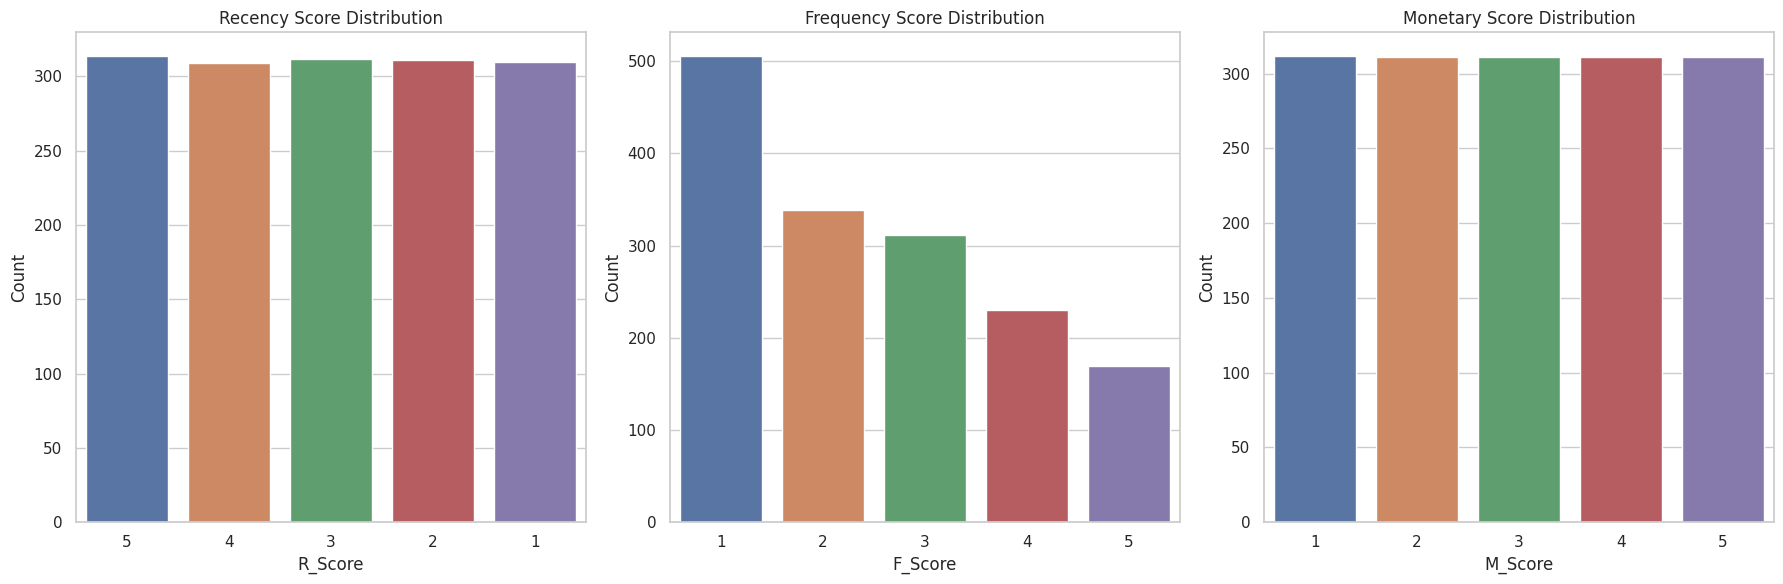

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for Recency Score Counts
sns.barplot(x=r_score_counts.index, y=r_score_counts.values, ax=axes[0])
axes[0].set_title('Recency Score Distribution')
axes[0].set_xlabel('R_Score')
axes[0].set_ylabel('Count')

# Plot for Frequency Score Counts
sns.barplot(x=f_score_counts.index, y=f_score_counts.values, ax=axes[1])
axes[1].set_title('Frequency Score Distribution')
axes[1].set_xlabel('F_Score')
axes[1].set_ylabel('Count')

# Plot for Monetary Score Counts
sns.barplot(x=m_score_counts.index, y=m_score_counts.values, ax=axes[2])
axes[2].set_title('Monetary Score Distribution')
axes[2].set_xlabel('M_Score')
axes[2].set_ylabel('Count')

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
df_rfm.head()

,Location,Brand,SubBrand,Category,SOP Number,Item Number,Item Description,QTY,Unit Price,Extended Price,...,product_size,Unique Description,Description Length,Unified IN,Subcategory,With Offer,Day,Month,Year,USD to LBP
0,zone1,remington,rem strtn,Persnoal Care,inv00000000005712,1604509,rem s1a100 my stylist straight,5,28.00,140.00,...,NaN,Yes,30,1604509,Hair Tools,0,2,1,2020,2118.333333
11,zone3,foamy,foamy,Personal Care,inv00000000005714,56856,foamy multi-use shampoo apple 5100ml,5,3.33,16.65,...,5100ml,Yes,36,56856,Hair Care,0,2,1,2020,2118.333333
12,zone3,foamy,foamy,Personal Care,inv00000000005714,56856,foamy multi-use shampoo apple 5100ml,1,0.00,0.00,...,5100ml,Yes,36,56856,Hair Care,0,2,1,2020,2118.333333
13,zone3,foamy,foamy,Personal Care,inv00000000005714,56858,x-pert shampoo rose 6l,5,3.33,16.65,...,6l,Yes,22,56858,Hair Care,0,2,1,2020,2118.333333
14,zone3,foamy,foamy,Personal Care,inv00000000005714,56858,x-pert shampoo rose 6l,1,0.00,0.00,...,6l,Yes,22,56858,Hair Care,0,2,1,2020,2118.333333


###4.5Creating the invoice df for the next step

In [ ]:
# import pandas as pd

# # Load your original DataFrame
# df_invoice = df_rfm

# # Group by 'SOP Number' and aggregate
# invoice_df = df_invoice.groupby('SOP Number').agg({
#     'Item Number': pd.Series.nunique,
#     'Category': pd.Series.nunique,
#     'Subcategory': pd.Series.nunique,  # Assuming 'SubCategory' exists in df_rfm
#     'Extended Price': 'sum',
#     'QTY': 'sum',
#     'Customer Number': 'first',  # Assuming each invoice has exactly one customer
#     'Document Date': 'first',  # Date of the invoice
#     'Location ID': 'first',  # Location of the invoice
#     'SOP Number' : 'first'
# }).rename(columns={
#     'Item Number': 'Product Variety',
#     'Category': 'Category Variety',
#     'Subcategory': 'SubCategory Variety',
#     'Extended Price': 'Total Extended Price',
#     'QTY': 'Total QTY'
# })

# # Calculate Percentage Offered and Count of Distinct Offered Items
# offered_data = df_invoice[df_invoice['Offer Status'] == 'Offer'].groupby('SOP Number').agg({
#     'QTY': 'sum',
#     'Item Number': pd.Series.nunique
# }).rename(columns={
#     'Item Number': 'Distinct Offered Items'
# })

# invoice_df = invoice_df.merge(offered_data, how='left', left_index=True, right_index=True)
# invoice_df['Percentage Offered'] = invoice_df['QTY'] / invoice_df['Total QTY']
# invoice_df.drop(columns='QTY', inplace=True)  # Remove the extra 'QTY' column

# # Fill NaN values with appropriate defaults
# invoice_df['Percentage Offered'].fillna(0, inplace=True)
# invoice_df['Distinct Offered Items'].fillna(0, inplace=True)

# # Save the aggregated data to a CSV
# invoice_df.to_csv('invoice.csv', index=False)

# print("Aggregated invoice data saved to 'invoice.csv'.")


In [ ]:
# import pandas as pd

# # Ensure 'Document Date' is a datetime
# df_invoice['Document Date'] = pd.to_datetime(df_invoice['Document Date'])

# # Sort by 'Document Date'
# df_invoice.sort_values(by='Document Date', inplace=True)

# # Function to calculate RFM values for a customer up to a given date
# def calculate_rfm_up_to_date(customer_number, invoice_date, df):
#     # Filter records for the customer up to the invoice date
#     customer_data = df[(df['Customer Number'] == customer_number) &
#                        (df['Document Date'] < invoice_date)]

#     # Calculate Recency
#     last_purchase = customer_data['Document Date'].max()
#     recency = (invoice_date - last_purchase).days if last_purchase else None

#     # Calculate Frequency
#     frequency = customer_data['SOP Number'].nunique()

#     # Calculate Monetary
#     monetary = customer_data['Extended Price'].sum()

#     return recency, frequency, monetary

# # Apply the function to each row in the invoice DataFrame
# invoice_df['Invoice_R'] = None
# invoice_df['Invoice_F'] = None
# invoice_df['Invoice_M'] = None

# for index, row in invoice_df.iterrows():
#     r, f, m = calculate_rfm_up_to_date(row['Customer Number'], row['Document Date'], df_invoice)
#     invoice_df.at[index, 'Invoice_R'] = r
#     invoice_df.at[index, 'Invoice_F'] = f
#     invoice_df.at[index, 'Invoice_M'] = m

# # Save the updated invoice data
# invoice_df.to_csv('invoice_with_rfm.csv', index=False)


In [ ]:
# import os
# os.chdir('/content/drive/MyDrive/Capstone')
# ########## very important check point  ############
# invoice_df.to_csv("invoice.csv", index = False)

##checking for lstm cleaning

In [ ]:
# df.isnull().sum()

In [ ]:
# #fill na for product_scent
# df['product_scent'].fillna('neutral', inplace=True)

In [ ]:
# import pandas as pd

# # Assuming df is your DataFrame
# # Replace this with your actual DataFrame loading or creation code

# # Filter the DataFrame for rows where 'Offer Status' is 'Yes'
# df_filtered = df[df['Offer Status'] == 'Offer']

# # Count the number of unique values in the 'Invoice' column
# unique_invoices_count = df_filtered['SOP Number'].nunique()

# print(f"Number of unique invoices with 'Yes' in Offer Status: {unique_invoices_count}")

# print((df["SOP Number"]).nunique())